In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Step 1: Load the dataset
# Assume 'diabetes.csv' is in the current directory
data = pd.read_csv('Datasets/diabetes.csv')

# Step 2: Prepare the data
# Separate features and target
X = data.iloc[:, :-1].values  # All columns except the last (features)
y = data.iloc[:, -1].values   # The last column (target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)



In [5]:
data.shape

(768, 9)

In [11]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [19]:
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [20]:
# Step 3: Build a simple neural network model
model = keras.Sequential([
    layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])



C:\Users\namya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Step 4: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.5178 - loss: 0.7057 - val_accuracy: 0.6259 - val_loss: 0.6418
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7006 - loss: 0.5938 - val_accuracy: 0.6835 - val_loss: 0.5791
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7544 - loss: 0.5325 - val_accuracy: 0.6906 - val_loss: 0.5490
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8112 - loss: 0.4803 - val_accuracy: 0.7338 - val_loss: 0.5252
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8064 - loss: 0.4513 - val_accuracy: 0.7266 - val_loss: 0.5138
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7947 - loss: 0.4533 - val_accuracy: 0.7266 - val_loss: 0.5064
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7695 - loss: 0.4813 - val_accuracy: 0.7482 - val_loss: 0.4962
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7769 - loss: 0.4620 - val_accuracy: 0.7410 - val_l

In [23]:
# Step 6: Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7555 - loss: 0.5516
Test Loss: 0.5597902536392212
Test Accuracy: 0.7532467246055603


In [48]:
print("Traning Accuracy: ", history.history['accuracy'][49])

Traning Accuracy:  0.8442028760910034


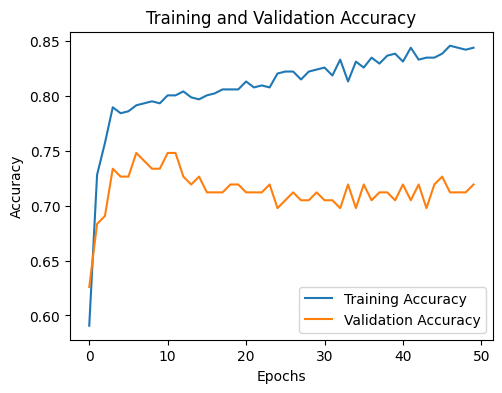

In [24]:
# Plot training and validation accuracy and loss if needed
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

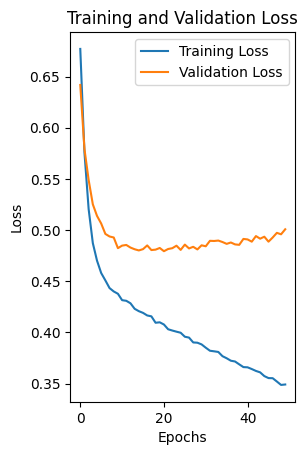

In [25]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

In [49]:
import numpy as np

# Example input: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age]
input_data = np.array([[2, 130, 70, 30, 0, 30.0, 0.5, 25]])  # Replace with your values

# Step 1: Standardize the input data
scaled_input = scaler.transform(input_data)  # Use the same scaler as used for training

# Step 2: Make a prediction
prediction = model.predict(scaled_input)

# Step 3: Interpret the prediction
predicted_label = (prediction >= 0.5).astype(int)  # Convert to binary label based on threshold

print(f"Predicted Probability: {prediction[0][0]}")
print(f"Predicted Label: {predicted_label[0][0]} (0: No Diabetes, 1: Diabetes)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
Predicted Probability: 0.35414940118789673
Predicted Label: 0 (0: No Diabetes, 1: Diabetes)


In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("Datasets/diabetes.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
data = df.iloc[:, :-1]
labels=df.iloc[:, -1]

In [23]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
data=sc.fit_transform(data)

In [24]:
print(data[0])

[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
  0.46849198  1.4259954 ]


In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(data, labels, test_size = 0.2)

In [26]:
from tensorflow.keras import layers, models
model=models.Sequential()
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [27]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [28]:
history=model.fit(x_train, y_train, epochs = 50, batch_size=32, validation_split=0.2)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6879 - loss: 0.6126 - val_accuracy: 0.7154 - val_loss: 0.5574
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7558 - loss: 0.5014 - val_accuracy: 0.7398 - val_loss: 0.5155
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7566 - loss: 0.4776 - val_accuracy: 0.7317 - val_loss: 0.4935
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7871 - loss: 0.4468 - val_accuracy: 0.7480 - val_loss: 0.4969
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8052 - loss: 0.4304 - val_accuracy: 0.7724 - val_loss: 0.4857
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7806 - loss: 0.4620 - val_accuracy: 0.7724 - val_loss: 0.4775
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8139 - loss: 0.4168 - val_accuracy: 0.7724 - val_loss: 0.4823
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8109 - loss: 0.4089 - val_accuracy: 0.7561 - val_loss

In [29]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,421 (111.02 KB)

 Trainable params: 9,473 (37.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,948 (74.02 KB)